<a href="https://colab.research.google.com/github/sakshikahandal/Project-folder-/blob/main/car_prices_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/CAR DETAILS FROM CAR DEKHO.csv")

In [ ]:
df.shape

(4340, 8)

In [ ]:
print(df.name.unique())

['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']


In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
# missing values
df.isnull().sum()/len(df)

name             0.0
year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
dtype: float64

In [ ]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [ ]:
print(df.name.unique())

['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']


In [ ]:
def  cleanName(x):
   return x.lower().split(" ")[0]

In [ ]:
df['name']= df.name.apply(lambda x: x.lower().split(" ")[0])

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.name.unique()

array(['maruti', 'hyundai', 'datsun', 'honda', 'tata', 'chevrolet',
       'toyota', 'jaguar', 'mercedes-benz', 'audi', 'skoda', 'jeep',
       'bmw', 'mahindra', 'ford', 'nissan', 'renault', 'fiat',
       'volkswagen', 'volvo', 'mitsubishi', 'land', 'daewoo', 'mg',
       'force', 'isuzu', 'opelcorsa', 'ambassador', 'kia'], dtype=object)

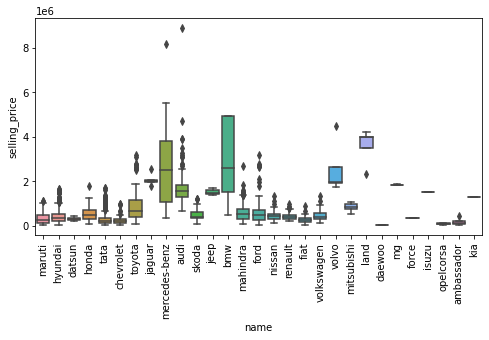

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='name',y='selling_price',data=df)
plt.xticks(rotation=90)
plt.show()


Text(400000, 6010000, 'Outliers')

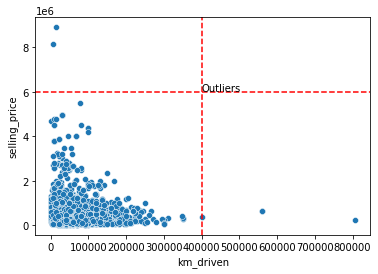

In [ ]:
sns.scatterplot(x='km_driven',y='selling_price',data=df)
plt.axhline(6000000,linestyle='--',color='red')
plt.axvline(400000,linestyle='--',color='red')
plt.text(s='Outliers',x=400000,y=6010000)

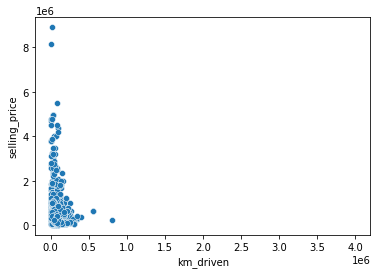

In [ ]:
sns.scatterplot(x='km_driven',y='selling_price',data=df)
plt.axhline(6000000,linestyle=' ')
plt.axvline(4000000,linestyle=' ')

In [ ]:
len(df[(df['selling_price'] < 6000000)  & (df['km_driven'] < 400000)])

4334

In [ ]:
df = df[(df['selling_price'] < 6000000)  & (df['km_driven'] < 400000)]

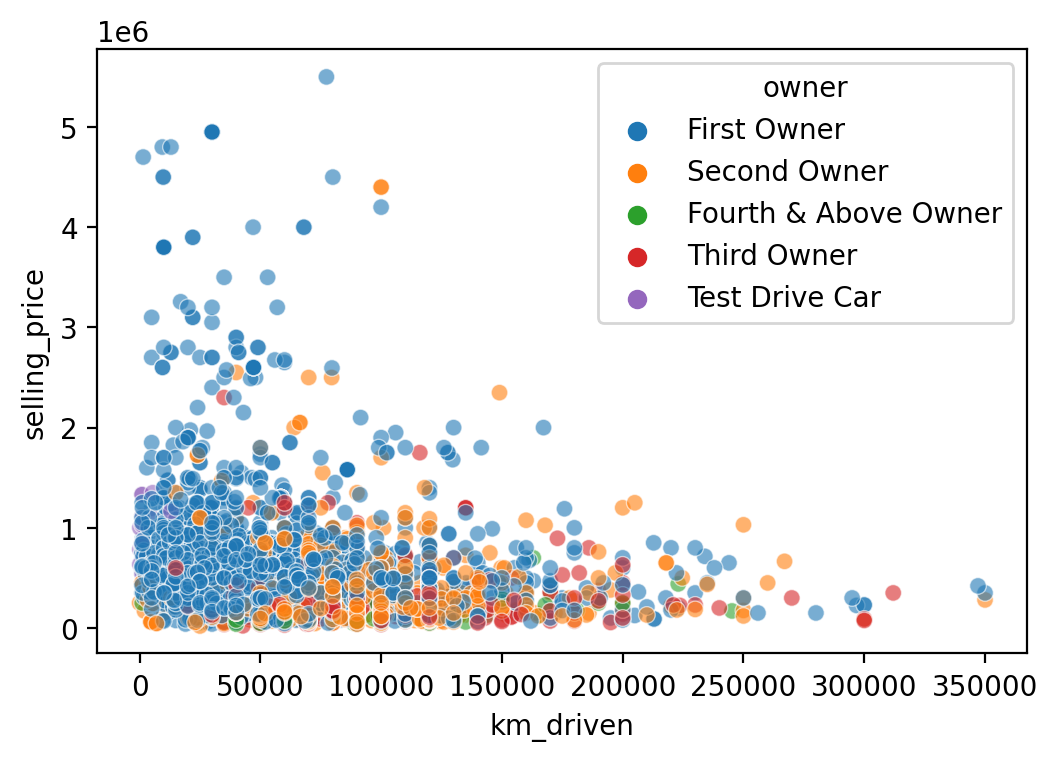

In [ ]:
plt.figure(dpi=200)
sns.scatterplot(x='km_driven',y='selling_price',data=df,hue='owner',alpha = 0.6)

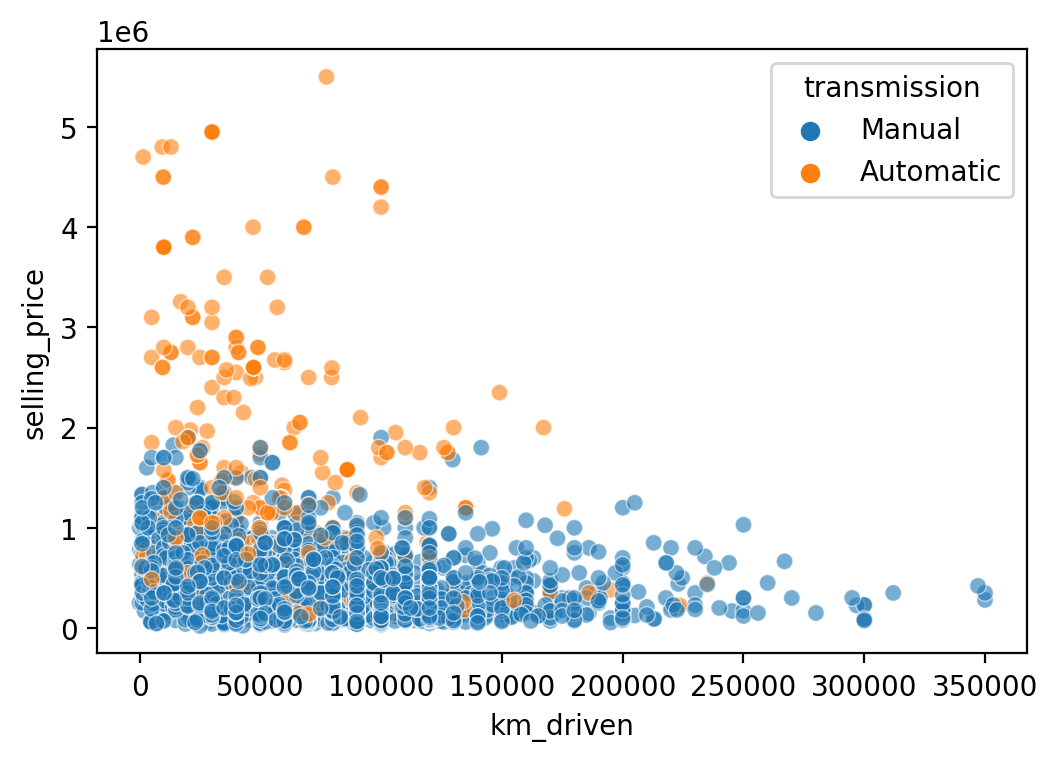

In [ ]:
plt.figure(dpi=200)
sns.scatterplot(x='km_driven',y='selling_price',data=df,hue='transmission',alpha = 0.6)

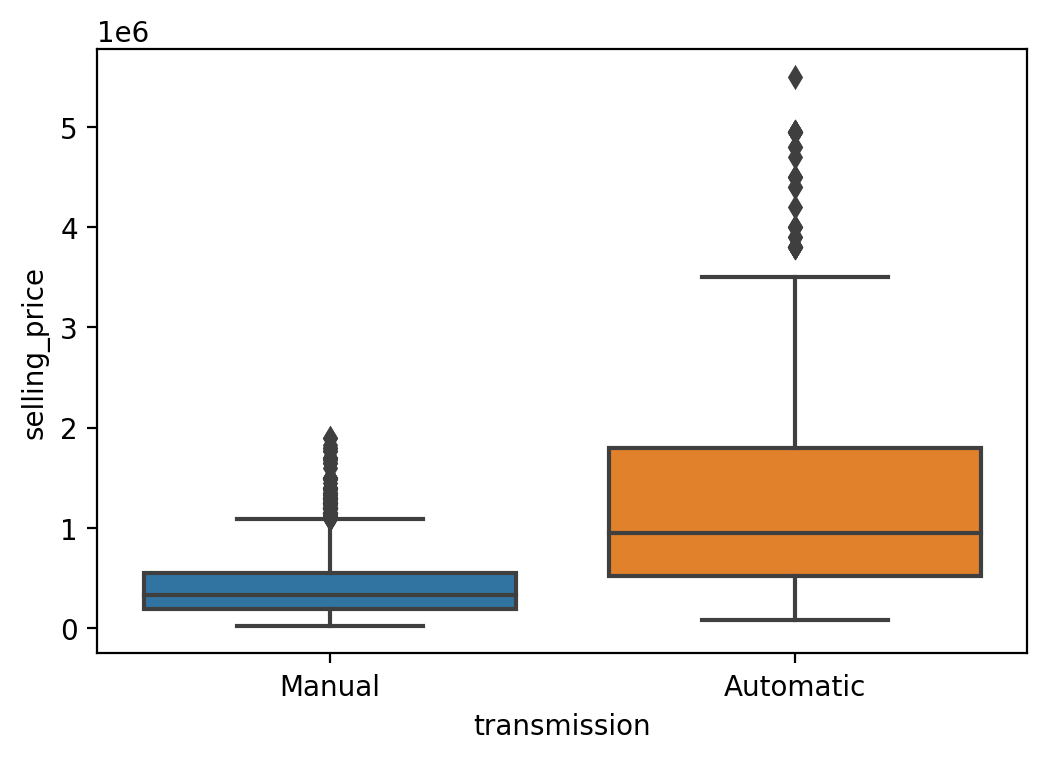

In [ ]:
plt.figure(dpi=200)
sns.boxplot(x='transmission',y='selling_price',data=df)

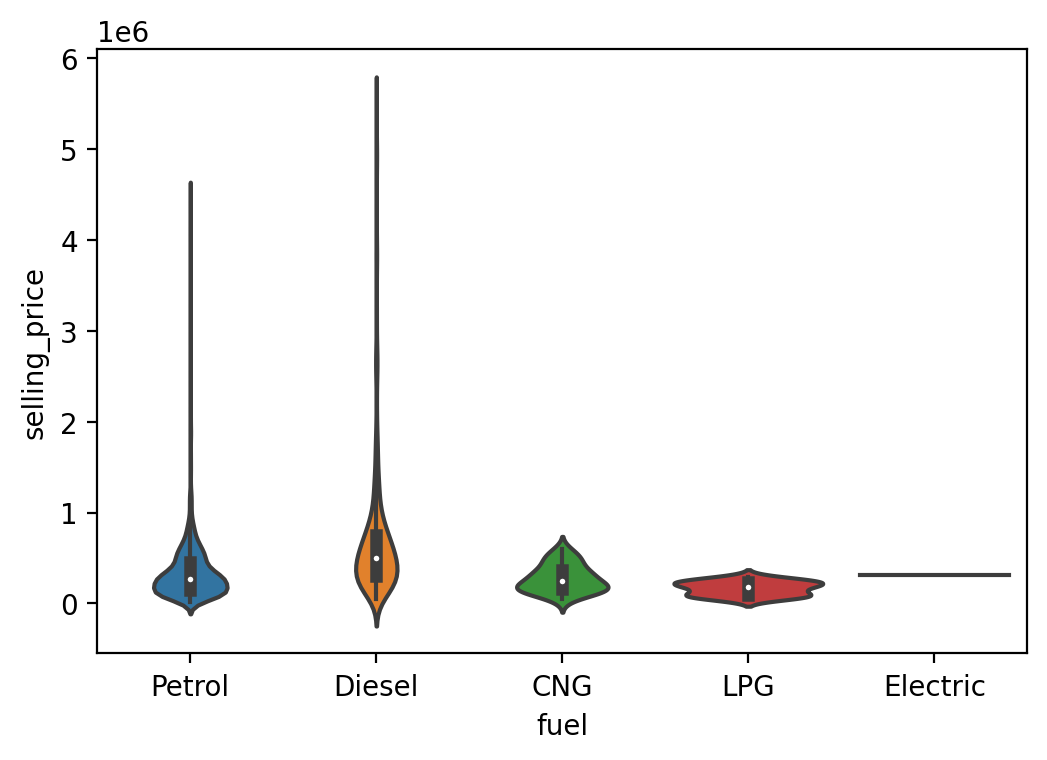

In [ ]:
plt.figure(dpi=200)
sns.violinplot(x='fuel',y='selling_price',data=df)

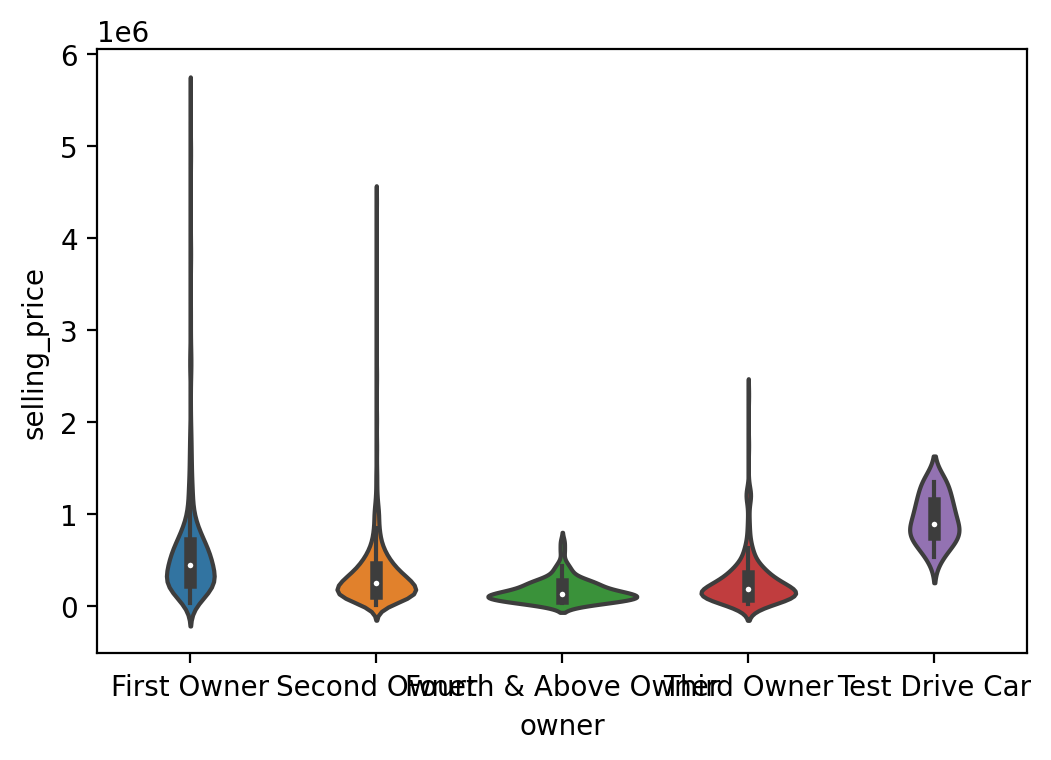

In [ ]:
plt.figure(dpi=200)
sns.violinplot(x='owner',y='selling_price',data=df)

In [ ]:
map_dict= {v:k for k,v in enumerate(df.owner.unique())}
map_dict['Fourth & Above Owner'] = 3
map_dict['Third Owner'] = 2
map_dict

{'First Owner': 0,
 'Second Owner': 1,
 'Fourth & Above Owner': 3,
 'Third Owner': 2,
 'Test Drive Car': 4}

In [ ]:
df['owner'] = df['owner'].apply(lambda x : map_dict[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,maruti,2007,60000,70000,Petrol,Individual,Manual,0
1,maruti,2007,135000,50000,Petrol,Individual,Manual,0
2,hyundai,2012,600000,100000,Diesel,Individual,Manual,0
3,datsun,2017,250000,46000,Petrol,Individual,Manual,0
4,honda,2014,450000,141000,Diesel,Individual,Manual,1
